# 時間序列繪圖

## 初始環境設定

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
# 指定默認字形：解決plot不能顯示中文問題
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
df=pd.read_excel('Tainan_198211-201811.xlsx')

## 檢查屬性

In [2]:
df.dtypes

Date         datetime64[ns]
SO2                 float64
CO                  float64
CO2                 float64
O3                  float64
PM10                  int64
PM25                  int64
Nox                 float64
NO                  float64
NO2                 float64
THC                 float64
NMHC                float64
CH4                 float64
WindSpeed           float64
TEMP                float64
Humidity            float64
dtype: object

## 屬性轉換

In [3]:
df["SO2"] = pd.to_numeric(df.SO2, errors='coerce')
df["CO"] = pd.to_numeric(df.CO, errors='coerce')
df["CO2"] = pd.to_numeric(df.CO2, errors='coerce')
df["O3"] = pd.to_numeric(df.O3, errors='coerce')
df["PM25"] = pd.to_numeric(df.PM25, errors='coerce')
df["Nox"] = pd.to_numeric(df.Nox, errors='coerce')
df["NO"] = pd.to_numeric(df.NO, errors='coerce')
df["NO2"] = pd.to_numeric(df.NO2, errors='coerce')
df["THC"] = pd.to_numeric(df.THC, errors='coerce')
df["NMHC"] = pd.to_numeric(df.NMHC, errors='coerce')
df["CH4"] = pd.to_numeric(df.CH4, errors='coerce')
df["WindSpeed"] = pd.to_numeric(df.WindSpeed, errors='coerce')
df["TEMP"] = pd.to_numeric(df.TEMP, errors='coerce')
df["Humidity"] = pd.to_numeric(df.Humidity, errors='coerce')

In [4]:
df.head(10)

,Date,SO2,CO,CO2,O3,PM10,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity
0,1984-07-01,85.3,0.99,0.0,0.0,77,0,26.84,17.45,8.98,0.0,0.0,0.0,0.0,0.0,68.46
1,1984-08-01,96.8,1.13,0.0,12.0,79,0,23.30,18.64,0.00,0.0,0.0,0.0,0.0,0.0,67.75
2,1984-09-01,118.1,1.16,0.0,18.8,75,0,30.23,15.31,18.36,0.0,0.0,0.0,0.0,0.0,73.83
3,1984-10-01,112.5,1.23,0.0,0.0,98,0,35.56,12.73,22.31,0.0,0.0,0.0,0.0,0.0,63.96
4,1984-11-01,96.5,1.15,0.0,20.8,63,0,38.02,15.00,22.51,0.0,0.0,0.0,0.0,0.0,62.99
5,1984-12-01,86.3,1.29,0.0,18.0,75,0,44.89,19.82,25.18,0.0,0.0,0.0,0.0,0.0,63.42
6,1985-01-01,85.6,1.13,0.0,17.7,63,0,80.16,36.76,42.95,0.0,0.0,0.0,0.0,0.0,64.29
7,1985-02-01,100.7,1.42,0.0,23.2,72,0,59.05,25.16,33.01,0.0,0.0,0.0,0.0,0.0,57.22
8,1985-03-01,82.3,1.12,0.0,25.9,71,0,22.22,0.00,13.83,0.0,0.0,0.0,0.0,0.0,62.43
9,1985-05-01,95.2,1.20,0.0,18.0,71,0,35.57,14.86,20.69,0.0,0.0,0.0,0.0,0.0,72.41


In [5]:
df.dtypes

Date         datetime64[ns]
SO2                 float64
CO                  float64
CO2                 float64
O3                  float64
PM10                  int64
PM25                  int64
Nox                 float64
NO                  float64
NO2                 float64
THC                 float64
NMHC                float64
CH4                 float64
WindSpeed           float64
TEMP                float64
Humidity            float64
dtype: object

In [6]:
df.corr()[['PM25']].sort_values('PM25')  

,PM25
NO,-0.299576
CO,-0.299143
SO2,-0.249431
Nox,-0.213414
NO2,-0.105756
NMHC,0.083564
TEMP,0.166306
THC,0.214696
CH4,0.228863
WindSpeed,0.242859


In [7]:
X = df[['SO2', 'CO','CO2', 'O3', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4', 'WindSpeed','TEMP','Humidity']]

y = df['PM25']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(20)

In [12]:
df1

,Actual,Predicted
299,0,-3.040267
1015,22,30.433527
1172,28,25.722091
1316,34,27.168270
594,0,1.800591
369,0,2.542945
1113,14,-11.912092
499,0,12.510263
1099,37,24.519938
892,56,35.253219


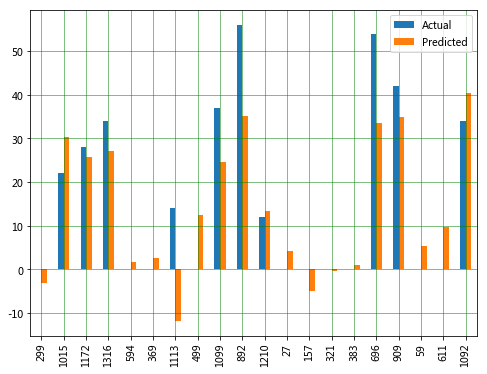

In [13]:
df1.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, y_pred))  
print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, y_pred))  

The Explained Variance: 0.75
The Mean Absolute Error: 7.10 
The Median Absolute Error: 5.39 


# 神經網路

In [25]:
import pandas as pd  
import numpy as np  
import tensorflow as tf  
from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  

In [26]:
df=pd.read_excel('Tainan_198211-201811.xlsx')
# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
SO2,1323.0,8.397203,15.092332,0.0,3.300,4.20,5.800,118.100
CO,1323.0,0.563114,0.364326,0.0,0.360,0.49,0.610,4.000
CO2,1323.0,52.127551,138.706959,0.0,0.000,0.00,0.000,456.060
O3,1323.0,26.946107,8.660834,0.0,22.000,26.80,32.300,51.700
PM10,1323.0,68.972033,28.018661,0.0,46.000,71.00,90.000,158.000
PM25,1323.0,16.894180,19.616389,0.0,0.000,0.00,34.500,69.000
Nox,1323.0,22.588791,11.863296,0.0,14.285,20.58,27.885,90.070
NO,1323.0,5.642373,5.663432,0.0,2.330,3.80,6.380,45.830
NO2,1323.0,16.870385,7.281952,0.0,11.325,16.29,21.730,44.980
THC,1323.0,1.070606,1.132915,0.0,0.000,0.00,2.156,3.295


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 16 columns):
Date         1323 non-null datetime64[ns]
SO2          1323 non-null float64
CO           1323 non-null float64
CO2          1323 non-null float64
O3           1323 non-null float64
PM10         1323 non-null int64
PM25         1323 non-null int64
Nox          1323 non-null float64
NO           1323 non-null float64
NO2          1323 non-null float64
THC          1323 non-null float64
NMHC         1323 non-null float64
CH4          1323 non-null float64
WindSpeed    1323 non-null float64
TEMP         1323 non-null float64
Humidity     1323 non-null float64
dtypes: datetime64[ns](1), float64(13), int64(2)
memory usage: 165.5 KB


In [28]:
X = df[['SO2', 'CO', 'O3','CO2', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4', 'WindSpeed','TEMP','Humidity']]

In [29]:
y = df['PM25']  

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [31]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1])) 

Training instances   1058, Training features   13
Validation instances 133, Validation features 13
Testing instances    132, Testing features    13


In [32]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]  

In [33]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,  
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000017F0EFD0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):  
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [35]:
wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400)

<function tensorflow.python.estimator.inputs.pandas_io.pandas_input_fn.<locals>.input_fn()>

In [36]:
evaluations = []  
STEPS = 400  
for i in range(100):  
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 128852.234, step = 1
INFO:tensorflow:global_step/sec: 188.537
INFO:tensorflow:loss = 27453.477, step = 101 (0.530 sec)
INFO:tensorflow:global_step/sec: 221.043
INFO:tensorflow:loss = 25473.5, step = 201 (0.452 sec)
INFO:tensorflow:global_step/sec: 221.043
INFO:tensorflow:loss = 23626.98, step = 301 (0.452 sec)
INFO:tensorflow:Saving checkpoints for 400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: tf_wx_model\model.ckpt-2000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 24222.66, step = 2001
INFO:tensorflow:global_step/sec: 194.929
INFO:tensorflow:loss = 22082.41, step = 2101 (0.516 sec)
INFO:tensorflow:global_step/sec: 215.886
INFO:tensorflow:loss = 24375.086, step = 2201 (0.459 sec)
INFO:tensorflow:global_step/sec: 201.362
INFO:tensorflow:loss = 20868.984, step = 2301 (0.497 sec)
INFO:tensorflow:Saving checkpoints for 2400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 22745.752.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done call

INFO:tensorflow:Saving checkpoints for 4400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 19593.76.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:40:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-04:41:00
INFO:tensorflow:Saving dict for global step 4400: average_loss = 56.51647, global_step = 4400, label/mean = 18.18045, loss = 7516.691, prediction/mean = 18.035412
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4400: tf_wx_model\model.ckpt-4400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4400
INFO:tensorfl

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 18690.248, step = 6401
INFO:tensorflow:global_step/sec: 194.25
INFO:tensorflow:loss = 20045.787, step = 6501 (0.515 sec)
INFO:tensorflow:global_step/sec: 206.782
INFO:tensorflow:loss = 15596.556, step = 6601 (0.484 sec)
INFO:tensorflow:global_step/sec: 213.675
INFO:tensorflow:loss = 14983.537, step = 6701 (0.468 sec)
INFO:tensorflow:Saving checkpoints for 6800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 19204.195.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:41:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restor

INFO:tensorflow:Loss for final step: 14695.992.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:41:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-04:41:49
INFO:tensorflow:Saving dict for global step 8800: average_loss = 53.044464, global_step = 8800, label/mean = 18.18045, loss = 7054.9136, prediction/mean = 18.14626
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8800: tf_wx_model\model.ckpt-8800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 18346.049, step = 10801
INFO:tensorflow:global_step/sec: 177.489
INFO:tensorflow:loss = 18759.574, step = 10901 (0.579 sec)
INFO:tensorflow:global_step/sec: 194.473
INFO:tensorflow:loss = 13532.789, step = 11001 (0.514 sec)
INFO:tensorflow:global_step/sec: 203.665
INFO:tensorflow:loss = 15748.488, step = 11101 (0.475 sec)
INFO:tensorflow:Saving checkpoints for 11200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 14141.679.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:42:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model

INFO:tensorflow:Loss for final step: 19565.797.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:42:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-04:42:35
INFO:tensorflow:Saving dict for global step 13200: average_loss = 54.839508, global_step = 13200, label/mean = 18.18045, loss = 7293.655, prediction/mean = 18.137186
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13200: tf_wx_model\model.ckpt-13200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 17448.83, step = 15201
INFO:tensorflow:global_step/sec: 125.691
INFO:tensorflow:loss = 18975.818, step = 15301 (0.796 sec)
INFO:tensorflow:global_step/sec: 142.247
INFO:tensorflow:loss = 15720.523, step = 15401 (0.703 sec)
INFO:tensorflow:global_step/sec: 128.205
INFO:tensorflow:loss = 8927.294, step = 15501 (0.780 sec)
INFO:tensorflow:Saving checkpoints for 15600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 12396.86.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:43:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:Loss for final step: 18739.227.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:44:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-04:44:00
INFO:tensorflow:Saving dict for global step 17600: average_loss = 52.936398, global_step = 17600, label/mean = 18.18045, loss = 7040.541, prediction/mean = 18.058136
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 17600: tf_wx_model\model.ckpt-17600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 14180.546, step = 19601
INFO:tensorflow:global_step/sec: 194.25
INFO:tensorflow:loss = 11706.821, step = 19701 (0.515 sec)
INFO:tensorflow:global_step/sec: 213.675
INFO:tensorflow:loss = 12355.586, step = 19801 (0.468 sec)
INFO:tensorflow:global_step/sec: 213.675
INFO:tensorflow:loss = 19824.547, step = 19901 (0.468 sec)
INFO:tensorflow:Saving checkpoints for 20000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8721.592.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:44:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:

INFO:tensorflow:Loss for final step: 8653.377.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:44:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-04:44:51
INFO:tensorflow:Saving dict for global step 22000: average_loss = 55.898655, global_step = 22000, label/mean = 18.18045, loss = 7434.521, prediction/mean = 18.655497
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22000: tf_wx_model\model.ckpt-22000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 12042.898, step = 24001
INFO:tensorflow:global_step/sec: 178.062
INFO:tensorflow:loss = 11101.095, step = 24101 (0.562 sec)
INFO:tensorflow:global_step/sec: 206.782
INFO:tensorflow:loss = 12481.466, step = 24201 (0.484 sec)
INFO:tensorflow:global_step/sec: 178.062
INFO:tensorflow:loss = 10592.888, step = 24301 (0.562 sec)
INFO:tensorflow:Saving checkpoints for 24400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 14811.631.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:45:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflo

INFO:tensorflow:Loss for final step: 11979.533.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:45:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-26400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-04:45:45
INFO:tensorflow:Saving dict for global step 26400: average_loss = 57.337143, global_step = 26400, label/mean = 18.18045, loss = 7625.84, prediction/mean = 18.72094
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 26400: tf_wx_model\model.ckpt-26400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-26400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_o

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-28400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 28400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 13477.315, step = 28401
INFO:tensorflow:global_step/sec: 178.062
INFO:tensorflow:loss = 12657.361, step = 28501 (0.562 sec)
INFO:tensorflow:global_step/sec: 160.256
INFO:tensorflow:loss = 13325.152, step = 28601 (0.624 sec)
INFO:tensorflow:global_step/sec: 188.537
INFO:tensorflow:loss = 10523.316, step = 28701 (0.530 sec)
INFO:tensorflow:Saving checkpoints for 28800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 15787.505.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:46:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflo

INFO:tensorflow:Loss for final step: 10474.721.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:46:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-30800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-04:46:38
INFO:tensorflow:Saving dict for global step 30800: average_loss = 59.51292, global_step = 30800, label/mean = 18.18045, loss = 7915.2183, prediction/mean = 17.83793
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30800: tf_wx_model\model.ckpt-30800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-30800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-32800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 32800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10411.159, step = 32801
INFO:tensorflow:global_step/sec: 185.185
INFO:tensorflow:loss = 17711.047, step = 32901 (0.540 sec)
INFO:tensorflow:global_step/sec: 191.938
INFO:tensorflow:loss = 11048.985, step = 33001 (0.523 sec)
INFO:tensorflow:global_step/sec: 145.558
INFO:tensorflow:loss = 11727.188, step = 33101 (0.695 sec)
INFO:tensorflow:Saving checkpoints for 33200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10785.316.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:47:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflo

INFO:tensorflow:Loss for final step: 10896.628.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:47:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-35200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-04:47:28
INFO:tensorflow:Saving dict for global step 35200: average_loss = 62.32052, global_step = 35200, label/mean = 18.18045, loss = 8288.629, prediction/mean = 18.529947
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 35200: tf_wx_model\model.ckpt-35200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-35200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-37200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 37200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 7320.359, step = 37201
INFO:tensorflow:global_step/sec: 171.821
INFO:tensorflow:loss = 9728.294, step = 37301 (0.592 sec)
INFO:tensorflow:global_step/sec: 162.865
INFO:tensorflow:loss = 15995.189, step = 37401 (0.614 sec)
INFO:tensorflow:global_step/sec: 131.23
INFO:tensorflow:loss = 12637.883, step = 37501 (0.752 sec)
INFO:tensorflow:Saving checkpoints for 37600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10453.135.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:47:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:R

INFO:tensorflow:Loss for final step: 12093.843.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-28-04:48:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-39600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-28-04:48:19
INFO:tensorflow:Saving dict for global step 39600: average_loss = 62.062744, global_step = 39600, label/mean = 18.18045, loss = 8254.345, prediction/mean = 18.188808
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 39600: tf_wx_model\model.ckpt-39600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-39600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init

In [37]:
evaluations[0]  

{'average_loss': 60.99988,
 'label/mean': 18.18045,
 'loss': 8112.9844,
 'prediction/mean': 18.218763,
 'global_step': 400}

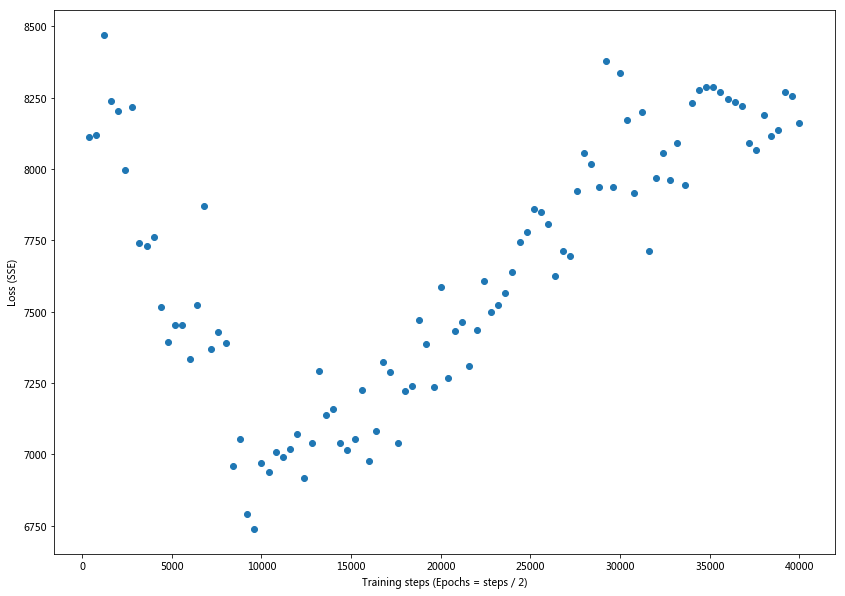

In [38]:
import matplotlib.pyplot as plt  
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps (Epochs = steps / 2)')  
plt.ylabel('Loss (SSE)')  
plt.show()  

In [39]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,  
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(  
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f " % mean_absolute_error(  
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f " % median_absolute_error(  
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.90
The Mean Absolute Error: 3.46 
The Median Absolute Error: 1.17 
